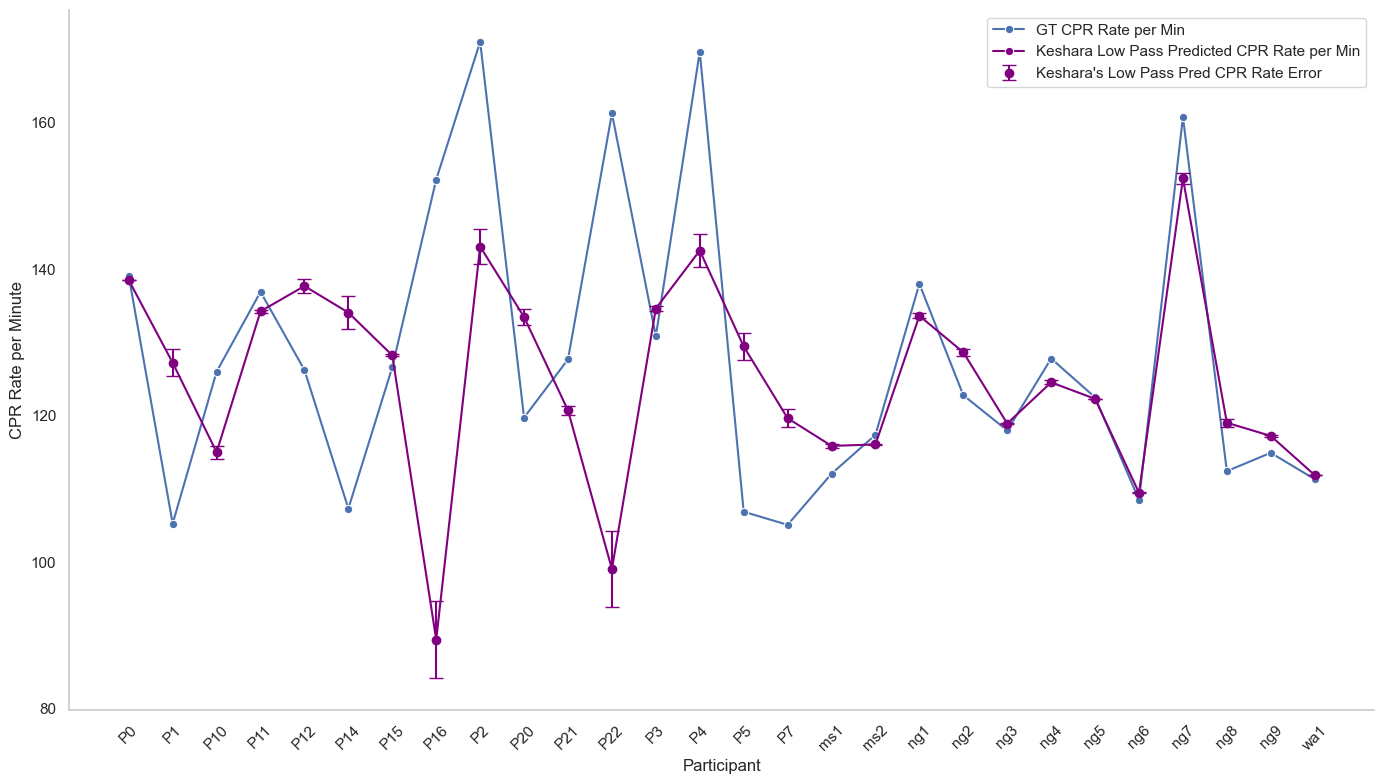

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
data = pd.read_csv("./averages_output.csv")

# Set plot style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot GT CPR Rate and Predicted CPR Rate
sns.lineplot(x='participant', y='GT_CPR_rate_per_min', data=data, marker='o', label='GT CPR Rate per Min', color='b')
# sns.lineplot(x='participant', y='Pred_CPR_rate_per_min', data=data, marker='o', label='Lahirus Predicted CPR Rate per Min', color='r')
# sns.lineplot(x='participant', y='Keshara_Pred_CPR_rate_per_min', data=data, marker='o', label='Keshara Predicted CPR Rate per Min', color='g')
sns.lineplot(x='participant', y='Keshara_Low_Pass_Pred_CPR_rate_per_min', data=data, marker='o', label='Keshara Low Pass Predicted CPR Rate per Min', color='purple')

# plt.errorbar(data['participant'], data['Pred_CPR_rate_per_min'], yerr=abs(data['CPR_rate_error']), fmt='o', color='red', label='Predicted CPR Rate Error', capsize=5)

plt.errorbar(data['participant'], data['Keshara_Low_Pass_Pred_CPR_rate_per_min'], yerr=abs(data['Keshara_Low_Pass_Pred_CPR_rate_error']), fmt='o', color='purple', label="Keshara's Low Pass Pred CPR Rate Error", capsize=5)


# hide grid
plt.grid(False)
sns.despine()

# Customize plot
# plt.title("Comparison of Ground Truth and Predicted CPR Rates per Minute")
plt.xlabel("Participant")
plt.ylabel("CPR Rate per Minute")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


# Scatter plot of ground truth cpr rate

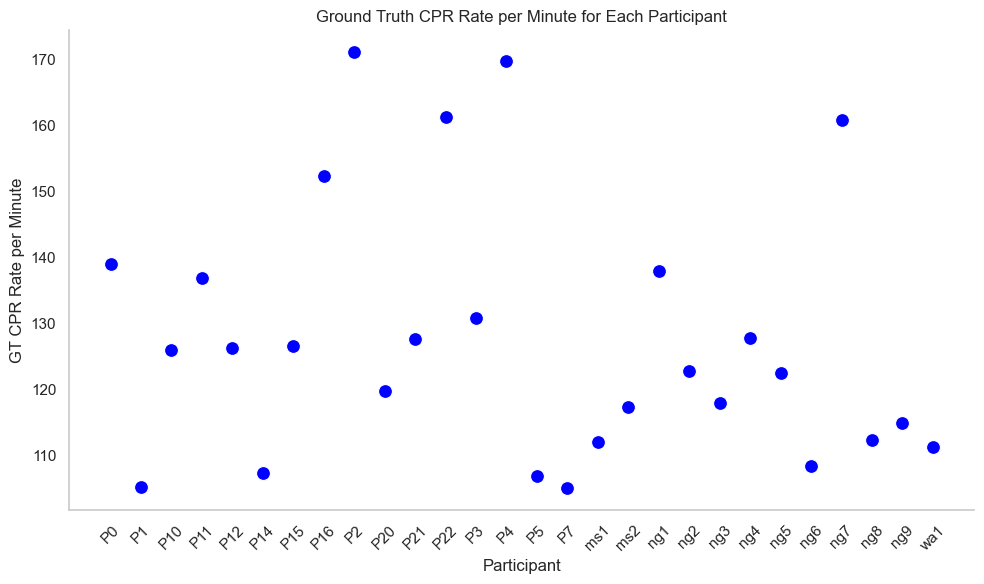

In [14]:
# Set plot style
sns.set(style="whitegrid")

# Create the scatter plot for Ground Truth CPR Rate per Minute
plt.figure(figsize=(10, 6))
sns.scatterplot(x='participant', y='GT_CPR_rate_per_min', data=data, s=100, color="blue")

# hide grid
plt.grid(False)
sns.despine()
# Customize plot
plt.title("Ground Truth CPR Rate per Minute for Each Participant")
plt.xlabel("Participant")
plt.ylabel("GT CPR Rate per Minute")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

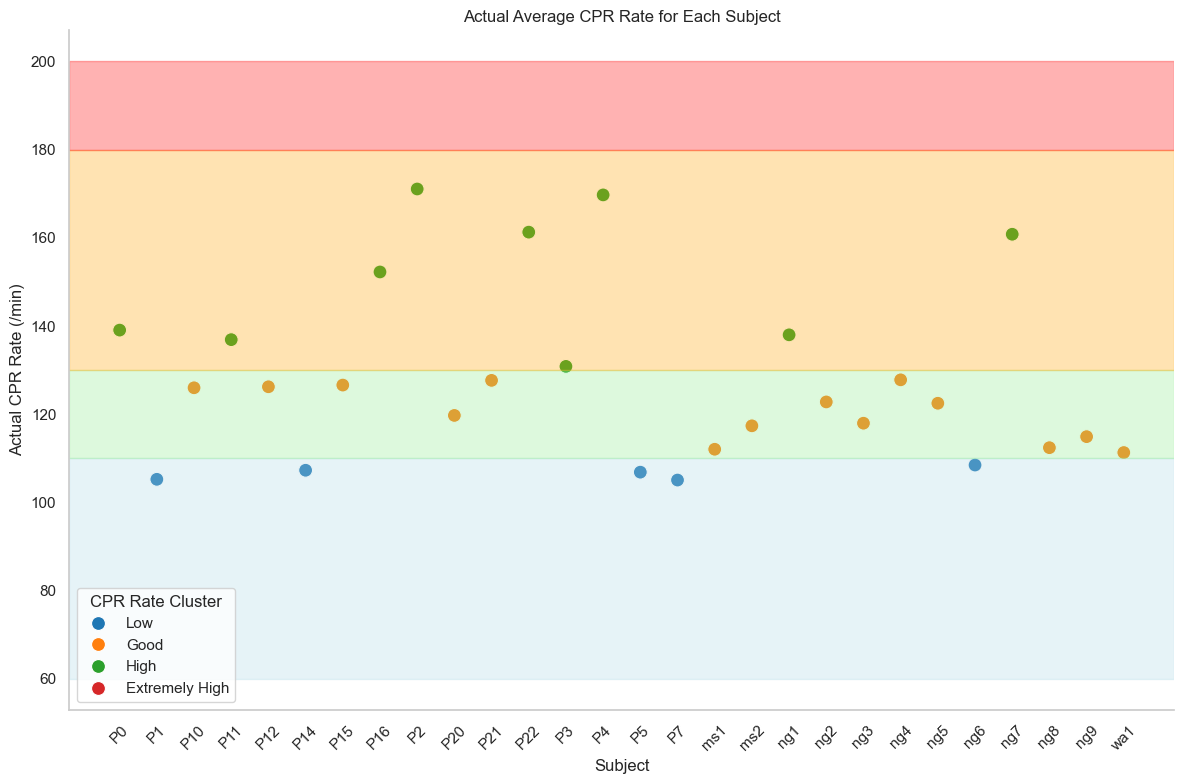

In [36]:
# Define ranges for CPR rate clusters
bins = [ 60, 110, 130, 180, 200]  # Adjust bins based on your data distribution
labels = ['Low', 'Good', 'High',  'Extremely High']
data['Rate_Cluster'] = pd.cut(data['GT_CPR_rate_per_min'], bins=bins, labels=labels)

# Set plot style
sns.set(style="whitegrid")

# Create the scatter plot with hue based on CPR rate clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='participant', y='GT_CPR_rate_per_min', data=data, hue='Rate_Cluster', s=100, palette="tab10")

# Highlight regions based on CPR rate clusters
plt.axhspan(60, 110, color='lightblue', alpha=0.3, label='')
plt.axhspan(110, 130, color='lightgreen', alpha=0.3, label='')
plt.axhspan(130, 180, color='orange', alpha=0.3, label='')
plt.axhspan(180, 200, color='red', alpha=0.3, label='')

# remove legend
plt.legend().remove()

plt.grid(False)
sns.despine()
# Customize plot
plt.title("Actual Average CPR Rate for Each Subject")
plt.xlabel("Subject")
plt.ylabel("Actual CPR Rate (/min)")
plt.xticks(rotation=45)
plt.legend(title="CPR Rate Cluster")
plt.tight_layout()

# save the plot
plt.savefig("./result_plots/GT_CPR_Rate_Per_Minute_by_Rate_Cluster.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

/scratch/cjh9fw/conda/egoexoems/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


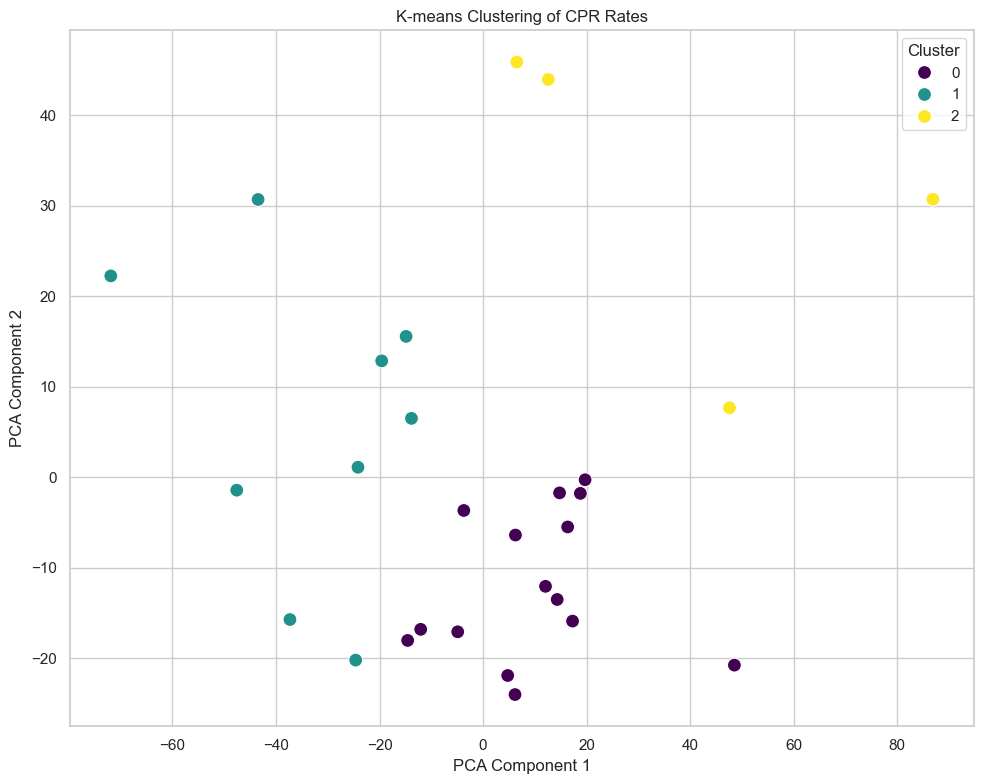

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from io import StringIO

# Select features for clustering
features = data[['GT_CPR_rate_per_min', 'Pred_CPR_rate_per_min', 'Keshara_Pred_CPR_rate_per_min', 'Keshara_Low_Pass_Pred_CPR_rate_per_min']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(features)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100, legend='full')

# Customize plot
plt.title("K-means Clustering of CPR Rates")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()

# Show the plot
plt.show()